<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://gitlab.com/worm1/worm-figures/-/raw/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Multi Sample Speciation Demo</h1><br />
</tr>
</table>
<\left>

For this small demo, water chemistry for multiple samples is provided in the input file 'input_example_wrm.csv'.

In [1]:
import AqEquil
ae = AqEquil.AqEquil()

In [2]:
# perform a speciation calculation with the default WORM database 'wrm'
speciation = ae.speciate(input_filename="input_example_wrm.csv",
                         exclude=["Year", "Area"],
                         delete_generated_folders=True)



Using wrm to speciate Crater Hills Geyser
Using wrm to speciate Gas Crack
Using wrm to speciate Spray Geyser Source
Using wrm to speciate Bison Pool
Using wrm to speciate Snail
Using wrm to speciate Ambergris
Using wrm to speciate MLS Source
Finished!


### Accessing and visualizing results of a speciation calculation

In [3]:
# summarize speciation results in a single report
speciation.report

Sample,Year,Area,pH,Temperature,HCO3-_(input),O2_(input),HS-_(input),SiO2_(input),METHANE_(input),H2_(input),...,O2/H2O,%CI of mean,%CI of total,Charge imbalance,IS (molal),Mean charge,Sigma(mz) anions,Sigma(mz) cations,Total charge,stoichiometric IS (molal)
,,,pH,degC,Molality,Molality,Molality,Molality,Molality,Molality,...,Eh_volts,%,%,eq/kg.H2O,molality,eq/kg.H2O,eq/kg.H2O,eq/kg.H2O,eq/kg.H2O,molality
Bison Pool,2014,YNP,7.640,92.2,0.005690,0.000009,0.000003,0.006270,0.000000e+00,0.000000e+00,...,0.586,-0.0126,-0.0063,-0.000002,0.013978,0.013789,-0.013790,0.013788,0.027577,0.014062
Spray Geyser Source,2012,YNP,8.021,92.9,0.005410,0.000003,0.000004,0.005030,0.000000e+00,0.000000e+00,...,0.548,0.0775,0.0387,0.000010,0.012973,0.012724,-0.012719,0.012729,0.025448,0.013078
Crater Hills Geyser,2012,YNP,3.327,89.0,0.000117,0.000000,0.000017,0.014400,0.000000e+00,0.000000e+00,...,NaN,2.3250,1.1625,0.000774,0.037512,0.033291,-0.032904,0.033678,0.066581,0.042070
Ambergris,2011,Iceland,8.452,81.5,0.000983,0.000053,0.000030,0.002480,8.900000e-09,3.970000e-08,...,0.567,20.0741,10.0370,0.000804,0.004737,0.004004,-0.003602,0.004406,0.008009,0.004880
MLS Source,2007,YNP,7.850,94.0,0.006785,0.000007,0.000002,0.004200,0.000000e+00,0.000000e+00,...,0.564,1.2435,0.6218,0.000224,0.018407,0.018009,-0.017897,0.018121,0.036018,0.018527
Gas Crack,2014,Oman,11.670,32.2,0.000033,0.000034,0.000006,0.000001,1.750000e-05,2.261290e-04,...,0.493,0.5602,0.2801,0.000122,0.023942,0.021789,-0.021728,0.021850,0.043577,0.024598
Snail,2014,Oman,11.650,23.8,0.000042,0.000009,0.000007,0.000010,1.371360e-04,2.471160e-04,...,0.512,0.7047,0.3524,0.000065,0.010831,0.009209,-0.009176,0.009241,0.018417,0.011069


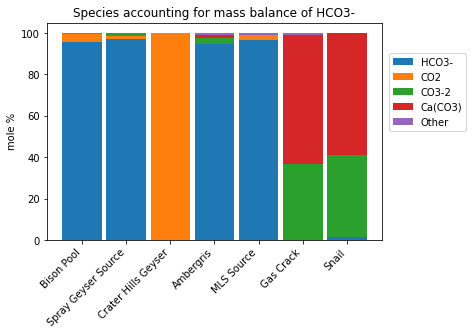

In [4]:
# visualize basis species contributions to aqueous species by mass
speciation.plot_mass_contribution("HCO3-")

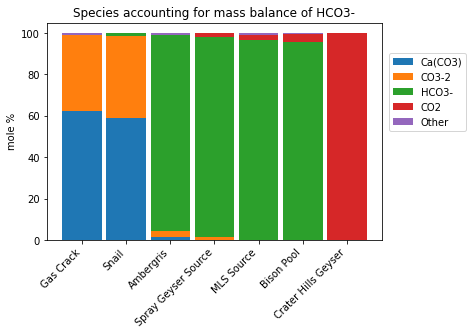

In [5]:
# visualize basis species contributions to aqueous species by mass
# and sort samples by a variable in the speciation report, e.g., pH
speciation.plot_mass_contribution("HCO3-", sort_by="pH", ascending=False)

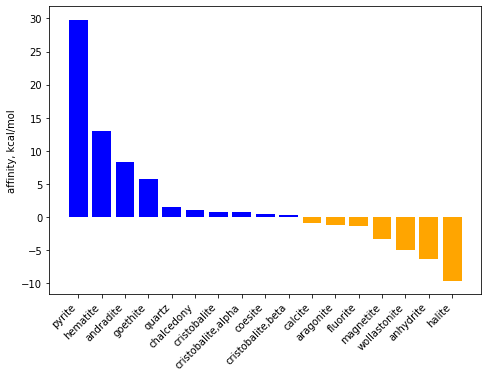

In [6]:
# visualize mineral saturation states in a sample with plot_mineral_saturation()
speciation.plot_mineral_saturation("Bison Pool")

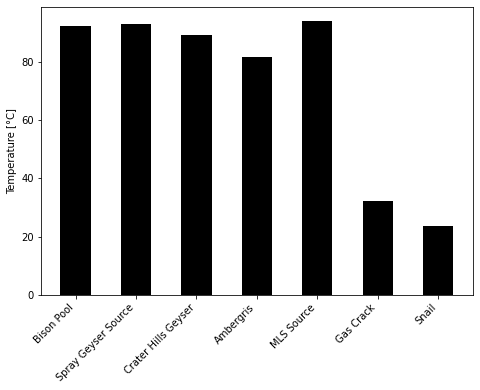

In [7]:
# create a barplot for a single variable in the report with barplot()
speciation.barplot("Temperature")

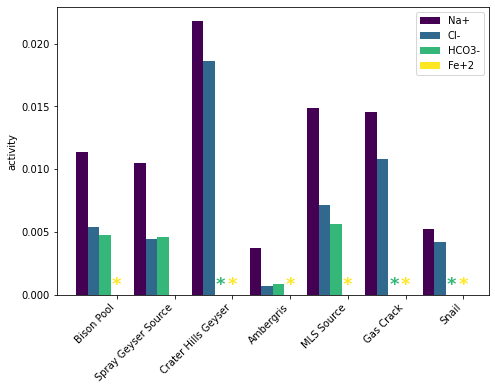

In [8]:
# list multiple variables in the report to create a grouped barplot
speciation.barplot(["Na+", "Cl-", "HCO3-", "Fe+2"])

In [9]:
# look up specific columns in the report with lookup()
speciation.lookup(["Temperature", "O2_(input)", "Na+", "Cl-", "HCO3-", "Fe+2"])

Sample,Temperature,O2_(input),Cl-,Fe+2,HCO3-,Na+
,degC,Molality,log_activity,log_activity,log_activity,log_activity
Bison Pool,92.2,0.000009,-2.2645,-17.4659,-2.3221,-1.9437
Spray Geyser Source,92.9,0.000003,-2.3501,NaN,-2.3354,-1.9774
Crater Hills Geyser,89.0,0.000000,-1.7301,-8.9201,-6.9104,-1.6612
Ambergris,81.5,0.000053,-3.1548,-20.9020,-3.0654,-2.4305
MLS Source,94.0,0.000007,-2.1433,-18.8209,-2.2472,-1.8286
Gas Crack,32.2,0.000034,-1.9644,-29.0027,-6.5521,-1.8377
Snail,23.8,0.000009,-2.3782,-28.5679,-6.2581,-2.2818


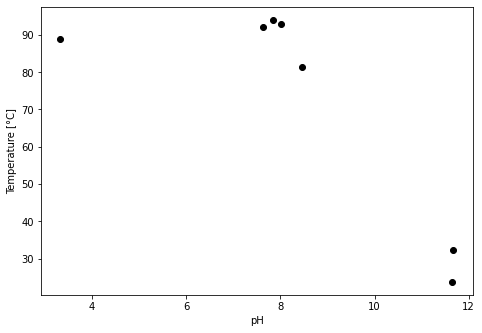

In [10]:
# plot two variables in the report against each other with scatterplot()
speciation.scatterplot("pH", "Temperature")

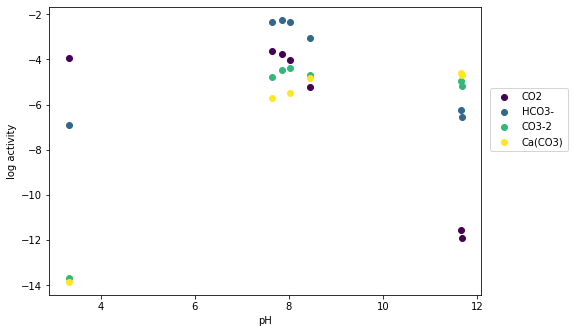

In [11]:
# Plot multiple dependent variables by providing scatterplot() with a list.
# Change the legend coordinates with legend_loc.
speciation.scatterplot("pH", ["CO2", "HCO3-", "CO3-2", "Ca(CO3)"], legend_loc=(1.02, 0.5))

In [12]:
# look up speciation results for a single sample
sample = "Ambergris"
data_type = "redox"
speciation.sample_data[sample][data_type]

,Eh,pe,logfO2,Ah
DEFAULT,0.567,8.0589,-1.173,13.078
O2/H2O,0.567,8.0598,-1.169,13.080
NH4+/NO3-,0.109,1.5492,-27.212,2.514
HS-/SO4-2,-0.421,-5.9828,-57.340,-9.709
H2/H2O,-0.444,-6.3044,-58.626,-10.231
METHANE/HCO3-,-0.440,-6.2584,-58.442,-10.156
CO/HCO3-,-0.703,-9.9955,-73.391,-16.221


In the cell above, substitute any of the following keys for `aq_distribution` above to examine calculated results.

- `filename` : name of the raw EQ3 output file.
- `name` : name of the sample.
- `temperature` : temperature.
- `pressure` : pressure.
- `logact_H2O` : log activity of water (log mol/kg).
- `H2O_density` : density of water (g/ml).
- `H2O_molality` : molality of water.
- `H2O_log_molality` : log molality of water.
- `aq_distribution` : distribution of aqueous species after speciation.
- `mass_contribution` : major species by contribution to aqueous mass balances.
- `mineral_sat` : saturation states of pure solids.
- `redox` : aqueous redox reaction potentials.
- `charge_balance` : charge balance and ionic strength information.

### Tips and Tricks

**View entire tables** (instead of the first and last few entries) in a notebook by pasting the code below into a cell and running it. This will tell the notebook to show entire tables.

```python
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
```

You can undo this with:
```python
pd.reset_option("display")
```

**View the documentation** of a function with a question mark. For instance, get help with the scatterplot function and see a description of all the parameters it takes:

```python
speciation.scatterplot?
```